In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

import random

In [3]:
df = pd.read_excel('Simdata.xlsx')

In [86]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
4,4,8,30,5,0,6000,0.01,1,0.8,1,...,7.258007,-1.739376,7.258007,-4.172764,1.112599,6.460021,5.806241,1.021725,5.92507,5.799082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5,8,30,5,0,8000,0.06,19,8,1,...,666.29197,-634.06744,54.7883,-1.050822,2.718602,3.512855,1.292155,-2.965152,3.611066,-1.217835
6000,5,8,30,5,0,8000,0.07,19,8,1,...,756.507298,-719.95368,62.669684,-1.050772,2.428899,3.377128,1.390394,-2.637932,3.475765,-1.31761
6001,5,8,30,5,0,8000,0.08,19,8,1,...,846.722626,-805.83992,70.551067,-1.050733,2.228196,3.270322,1.4677,-2.413341,3.369305,-1.396117
6002,5,8,30,5,0,8000,0.09,19,8,1,...,936.937954,-891.726161,78.43245,-1.050701,2.080941,3.184085,1.530118,-2.249641,3.283353,-1.459501


In [4]:
df = df.iloc[3:]
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
4,4,8,30,5,0,6000,0.01,1,0.8,1,...,7.258007,-1.739376,7.258007,-4.172764,1.112599,6.460021,5.806241,1.021725,5.92507,5.799082
5,4,8,30,5,0,6000,0.02,1,0.8,1,...,9.516015,-2.089864,9.516015,-4.553413,1.290282,5.743209,4.451127,1.138872,5.507815,4.836202
6,4,8,30,5,0,6000,0.03,1,0.8,1,...,11.774022,-2.440352,11.774022,-4.824723,1.466168,5.301336,3.615776,1.25555,5.210414,4.149904
7,4,8,30,5,0,6000,0.04,1,0.8,1,...,14.032029,-2.790839,14.032029,-5.027889,1.640285,5.001673,3.049272,1.371764,4.987711,3.635983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5,8,30,5,0,8000,0.06,19,8,1,...,666.29197,-634.06744,54.7883,-1.050822,2.718602,3.512855,1.292155,-2.965152,3.611066,-1.217835
6000,5,8,30,5,0,8000,0.07,19,8,1,...,756.507298,-719.95368,62.669684,-1.050772,2.428899,3.377128,1.390394,-2.637932,3.475765,-1.31761
6001,5,8,30,5,0,8000,0.08,19,8,1,...,846.722626,-805.83992,70.551067,-1.050733,2.228196,3.270322,1.4677,-2.413341,3.369305,-1.396117
6002,5,8,30,5,0,8000,0.09,19,8,1,...,936.937954,-891.726161,78.43245,-1.050701,2.080941,3.184085,1.530118,-2.249641,3.283353,-1.459501


In [5]:
df.columns = df.iloc[0]
df = df.iloc[1:]
df

3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
4,4,8,30,5,0,6000,0.01,1,0.8,1,...,7.258007,-1.739376,7.258007,-4.172764,1.112599,6.460021,5.806241,1.021725,5.92507,5.799082
5,4,8,30,5,0,6000,0.02,1,0.8,1,...,9.516015,-2.089864,9.516015,-4.553413,1.290282,5.743209,4.451127,1.138872,5.507815,4.836202
6,4,8,30,5,0,6000,0.03,1,0.8,1,...,11.774022,-2.440352,11.774022,-4.824723,1.466168,5.301336,3.615776,1.25555,5.210414,4.149904
7,4,8,30,5,0,6000,0.04,1,0.8,1,...,14.032029,-2.790839,14.032029,-5.027889,1.640285,5.001673,3.049272,1.371764,4.987711,3.635983
8,4,8,30,5,0,6000,0.05,1,0.8,1,...,16.290036,-3.141327,16.290036,-5.185718,1.812658,4.785085,2.639817,1.487516,4.814703,3.236741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5,8,30,5,0,8000,0.06,19,8,1,...,666.29197,-634.06744,54.7883,-1.050822,2.718602,3.512855,1.292155,-2.965152,3.611066,-1.217835
6000,5,8,30,5,0,8000,0.07,19,8,1,...,756.507298,-719.95368,62.669684,-1.050772,2.428899,3.377128,1.390394,-2.637932,3.475765,-1.31761
6001,5,8,30,5,0,8000,0.08,19,8,1,...,846.722626,-805.83992,70.551067,-1.050733,2.228196,3.270322,1.4677,-2.413341,3.369305,-1.396117
6002,5,8,30,5,0,8000,0.09,19,8,1,...,936.937954,-891.726161,78.43245,-1.050701,2.080941,3.184085,1.530118,-2.249641,3.283353,-1.459501


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 4 to 6003
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Teeth number        6000 non-null   object
 1   Radius              6000 non-null   object
 2   Helix angle         6000 non-null   object
 3   Rake angle          6000 non-null   object
 4   Runout              6000 non-null   object
 5   Spindle speed       6000 non-null   object
 6   Feed                6000 non-null   object
 7   Axial depth of cut  6000 non-null   object
 8   Radia depth of cut  6000 non-null   object
 9   Up or Down          6000 non-null   object
 10  Fx_max              6000 non-null   object
 11  Fx_min              6000 non-null   object
 12  MAX_fxmax_fxmin     6000 non-null   object
 13  Fx_maxabs           6000 non-null   object
 14  Fx_avg              6000 non-null   object
 15  Fx_var              6000 non-null   object
 16  Fx_max_to_avg       6000

In [7]:
df = df.apply(pd.to_numeric)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 4 to 6003
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Teeth number        6000 non-null   int64  
 1   Radius              6000 non-null   int64  
 2   Helix angle         6000 non-null   int64  
 3   Rake angle          6000 non-null   int64  
 4   Runout              6000 non-null   int64  
 5   Spindle speed       6000 non-null   int64  
 6   Feed                6000 non-null   float64
 7   Axial depth of cut  6000 non-null   int64  
 8   Radia depth of cut  6000 non-null   float64
 9   Up or Down          6000 non-null   int64  
 10  Fx_max              6000 non-null   float64
 11  Fx_min              6000 non-null   float64
 12  MAX_fxmax_fxmin     6000 non-null   float64
 13  Fx_maxabs           6000 non-null   float64
 14  Fx_avg              6000 non-null   float64
 15  Fx_var              6000 non-null   float64
 16  Fx_max

In [8]:
df.reset_index(drop=True)

3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
0,4,8,30,5,0,6000,0.01,1,0.8,1,...,7.258007,-1.739376,7.258007,-4.172764,1.112599,6.460021,5.806241,1.021725,5.925070,5.799082
1,4,8,30,5,0,6000,0.02,1,0.8,1,...,9.516015,-2.089864,9.516015,-4.553413,1.290282,5.743209,4.451127,1.138872,5.507815,4.836202
2,4,8,30,5,0,6000,0.03,1,0.8,1,...,11.774022,-2.440352,11.774022,-4.824723,1.466168,5.301336,3.615776,1.255550,5.210414,4.149904
3,4,8,30,5,0,6000,0.04,1,0.8,1,...,14.032029,-2.790839,14.032029,-5.027889,1.640285,5.001673,3.049272,1.371764,4.987711,3.635983
4,4,8,30,5,0,6000,0.05,1,0.8,1,...,16.290036,-3.141327,16.290036,-5.185718,1.812658,4.785085,2.639817,1.487516,4.814703,3.236741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5,8,30,5,0,8000,0.06,19,8.0,1,...,666.291970,-634.067440,54.788300,-1.050822,2.718602,3.512855,1.292155,-2.965152,3.611066,-1.217835
5996,5,8,30,5,0,8000,0.07,19,8.0,1,...,756.507298,-719.953680,62.669684,-1.050772,2.428899,3.377128,1.390394,-2.637932,3.475765,-1.317610
5997,5,8,30,5,0,8000,0.08,19,8.0,1,...,846.722626,-805.839920,70.551067,-1.050733,2.228196,3.270322,1.467700,-2.413341,3.369305,-1.396117
5998,5,8,30,5,0,8000,0.09,19,8.0,1,...,936.937954,-891.726161,78.432450,-1.050701,2.080941,3.184085,1.530118,-2.249641,3.283353,-1.459501


In [61]:
df.describe()

3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
count,6000.000000,6000.0,6000.0,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.500000,8.0,30.0,5.0,0.0,6000.000000,0.055000,10.000000,4.400000,1.0,...,215.756459,-161.264513,108.270743,-1.660902,2.973407,4.374436,1.972560,0.808291,4.529117,0.709929
std,0.500042,0.0,0.0,0.0,0.0,1633.129262,0.028725,5.745041,2.298017,0.0,...,172.888570,154.873043,80.192846,0.659392,2.510946,0.903340,1.042887,75.546488,0.788983,1.595751
min,4.000000,8.0,30.0,5.0,0.0,4000.000000,0.010000,1.000000,0.800000,1.0,...,7.258007,-977.612401,3.885956,-5.635758,0.852401,2.409950,0.125695,-2186.641259,3.201395,-1.529782
25%,4.000000,8.0,30.0,5.0,0.0,4000.000000,0.030000,5.000000,2.400000,1.0,...,84.012093,-226.464769,44.966352,-1.855804,1.704977,3.722121,1.234018,-4.294894,3.948812,-0.592107
50%,4.500000,8.0,30.0,5.0,0.0,6000.000000,0.055000,10.000000,4.400000,1.0,...,166.664668,-111.089907,88.417364,-1.473472,2.352331,4.274559,1.777703,1.739349,4.379924,0.405290
75%,5.000000,8.0,30.0,5.0,0.0,8000.000000,0.080000,15.000000,6.400000,1.0,...,303.888053,-47.322314,155.058076,-1.223074,3.428397,4.874370,2.477692,4.519279,4.962473,1.683989
max,5.000000,8.0,30.0,5.0,0.0,8000.000000,0.100000,19.000000,8.000000,1.0,...,1027.153283,-1.739376,396.548306,-1.011948,33.976091,6.667141,5.885952,432.924034,6.339921,5.799082


In [183]:
df.columns

Index(['Teeth number ', 'Radius', 'Helix angle', 'Rake angle', 'Runout',
       'Spindle speed', 'Feed', 'Axial depth of cut', 'Radia depth of cut',
       'Up or Down', 'Fx_max', 'Fx_min', 'MAX_fxmax_fxmin', 'Fx_maxabs',
       'Fx_avg', 'Fx_var', 'Fx_max_to_avg', 'Fy_max', 'Fy_min',
       'MAX_fymax_fymin', 'Fy_maxabs', 'Fy_avg ', 'Fy_var', 'Fy_max_to_avg',
       'Fz_max', 'Fz_min', 'MAX_fzmax_fzmin', 'Fz_maxabs', 'Fz_avg', 'Fz_var',
       'Fz_max_to_avg', 'xy_max_ratio', 'xz_max_ratio', 'yz_max_ratio',
       'xy_avg_ratio', 'xz_avg_ratio', 'yz_avg_ratio'],
      dtype='object', name=3)

In [184]:
df['Spindle speed'].describe()

count    6000.000000
mean     6000.000000
std      1633.129262
min      4000.000000
25%      4000.000000
50%      6000.000000
75%      8000.000000
max      8000.000000
Name: Spindle speed, dtype: float64

In [54]:
df['Feed'].describe()

count    6050.000000
mean        0.055008
std         0.028711
min         0.010000
25%         0.030000
50%         0.060000
75%         0.080000
max         0.100000
Name: Feed, dtype: float64

In [9]:
df2 = df.sample(n=50)
df2.reset_index(drop=True)
for i in range(0,len(df2['Spindle speed'])):

    #random spindle speed value for test --Spindle speed may take get values between 6000 and 8000 according to results above.--
    Sspeed1 = random.randint(1000, 3999)
    Sspeed2 = random.randint(8001,12000)

    #random feed value for test --Feed may take get values between 0.01 and 1.00 according to results above.--
    feed1 = round(random.uniform(0.001, 0.01), 2)
    feed2 = round(random.uniform(1.01, 10.00), 2)
    decision = random.choice([-1, 1])
    if(decision ==1):
        df2['Spindle speed'].iloc[i] = Sspeed1
        df2['Feed'].iloc[i] = feed1
    else:
        df2['Spindle speed'].iloc[i] = Sspeed2
        df2['Feed'].iloc[i] = feed2
        
df = pd.concat([df, df2], ignore_index=False)


/tmp/ipykernel_190190/1584523775.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Spindle speed'].iloc[i] = Sspeed2
/tmp/ipykernel_190190/1584523775.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Feed'].iloc[i] = feed2
/tmp/ipykernel_190190/1584523775.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Spindle speed'].iloc[i] = Sspeed1
/tmp/ipykernel_190190/1584523775.py:15: SettingWithCopyWarning: 
A value is

In [10]:
df = df


In [11]:
df.reset_index(drop=True)

3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_maxabs,Fz_avg,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio
0,4,8,30,5,0,6000,0.01,1,0.8,1,...,7.258007,-1.739376,7.258007,-4.172764,1.112599,6.460021,5.806241,1.021725,5.925070,5.799082
1,4,8,30,5,0,6000,0.02,1,0.8,1,...,9.516015,-2.089864,9.516015,-4.553413,1.290282,5.743209,4.451127,1.138872,5.507815,4.836202
2,4,8,30,5,0,6000,0.03,1,0.8,1,...,11.774022,-2.440352,11.774022,-4.824723,1.466168,5.301336,3.615776,1.255550,5.210414,4.149904
3,4,8,30,5,0,6000,0.04,1,0.8,1,...,14.032029,-2.790839,14.032029,-5.027889,1.640285,5.001673,3.049272,1.371764,4.987711,3.635983
4,4,8,30,5,0,6000,0.05,1,0.8,1,...,16.290036,-3.141327,16.290036,-5.185718,1.812658,4.785085,2.639817,1.487516,4.814703,3.236741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,4,8,30,5,0,3843,0.00,15,7.2,1,...,726.451906,-558.086198,305.157368,-1.301684,1.796724,3.233858,1.799863,-2.547989,3.358839,-1.318231
6046,4,8,30,5,0,10737,7.06,17,4.0,1,...,473.092317,-364.206277,235.775486,-1.298968,5.402345,3.882628,0.718693,-13.581704,3.890058,-0.286419
6047,5,8,30,5,0,8785,5.68,13,0.8,1,...,39.416766,-29.182667,29.991892,-1.350691,1.025828,5.951953,5.802096,1.023045,5.923546,5.790112
6048,4,8,30,5,0,3380,0.01,9,1.6,1,...,151.812433,-63.875719,151.812433,-2.376685,2.711195,4.478949,1.652021,2.796070,4.476312,1.600930


<h3>Local outlier factor</h3>

In [12]:
model = LocalOutlierFactor(n_neighbors=50,algorithm='auto',contamination=0.01)
model.fit(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])

LocalOutlierFactor(contamination=0.01, n_neighbors=50)

In [13]:
df['y_pred'] = model.fit_predict(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])
df['scores(LOF)']= model.negative_outlier_factor_

In [96]:
print(df['y_pred'].value_counts())

 1    5990
-1      60
Name: y_pred, dtype: int64


In [97]:
df.tail(50)

3,Teeth number,Radius,Helix angle,Rake angle,Runout,Spindle speed,Feed,Axial depth of cut,Radia depth of cut,Up or Down,...,Fz_var,Fz_max_to_avg,xy_max_ratio,xz_max_ratio,yz_max_ratio,xy_avg_ratio,xz_avg_ratio,yz_avg_ratio,y_pred,scores(LOF)
1138,4,8,30,5,0,9185,3.74,3,3.2,1,...,77.457369,-2.527085,2.636214,4.268525,1.619188,5.549066,4.563365,0.822366,-1,-7.016512
785,4,8,30,5,0,11896,7.54,15,7.2,1,...,66.031474,-1.223459,3.760510,5.006368,1.331300,58.241852,5.083739,0.087287,-1,-6.117252
1342,4,8,30,5,0,2104,0.00,7,3.2,1,...,257.845416,-2.309542,4.196349,3.956550,0.942855,22.472758,4.080628,0.181581,-1,-3.920452
5521,5,8,30,5,0,1061,0.00,11,1.6,1,...,151.152002,-1.616357,3.055144,4.370866,1.430658,3.099486,4.375794,1.411781,-1,-7.374180
3846,5,8,30,5,0,10439,9.69,17,4.0,1,...,12.804538,-1.039708,4.377086,4.998209,1.141903,4.669676,5.005940,1.072010,-1,-4.726115
5538,5,8,30,5,0,3698,0.00,11,3.2,1,...,136.698339,-1.502886,3.719701,4.544455,1.221726,5.431989,4.565568,0.840497,1,-1.177365
3247,5,8,30,5,0,2321,0.01,5,4.0,1,...,98.243374,-1.686385,2.526028,4.397026,1.740688,7.043331,4.680541,0.664535,-1,-6.385388
1653,4,8,30,5,0,3097,0.01,13,4.0,1,...,364.838416,-1.646989,4.856846,3.862528,0.795275,-13.523897,3.889726,-0.287619,1,-1.745107
5327,5,8,30,5,0,8605,9.20,7,2.4,1,...,113.289884,-1.932013,2.290430,4.856663,2.120415,2.832675,4.879822,1.722690,-1,-3.370580
1494,4,8,30,5,0,11731,5.53,9,8.0,1,...,31.441316,-1.195260,1.912037,5.861596,3.065629,11.211094,5.990834,0.534367,-1,-6.997289


In [14]:
lof_outliers = df.loc[df['y_pred']==-1]
lof_outlier_index = list(lof_outliers.index)

In [15]:
ref_df = df.tail(50)

In [16]:
count=0
for i in ref_df.y_pred:
    if(i == -1):
        count += 1
print('Accuracy score of model is:', (count/50)*100, '%' )

Accuracy score of model is: 84.0 %


<h3>Isolation Forest</h3>

In [77]:
#pre-build
Isomodel=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01))
Isomodel.fit(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])

/home/acy/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_estimators=50)

In [78]:
df['iso_scores']=Isomodel.decision_function(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])

df['iso_pred'] = Isomodel.predict(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])

In [79]:
iso_outliers = df.loc[df['iso_pred']==-1]
iso_outlier_index = list(iso_outliers.index)

In [81]:
ref_df = df.tail(50)
count=0
for i in ref_df.iso_pred:
    if(i == -1):
        count += 1
print('Accuracy score of model is:', (count/50)*100, '%' )

Accuracy score of model is: 0.0 %


<h2>Visualization</h2>

In [17]:
pca = PCA(2)  #decreasing to 2 dimension 
pca.fit(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']])

res=pd.DataFrame(pca.transform(df[['Spindle speed','Feed','Axial depth of cut','Radia depth of cut','Fx_max','Fx_min','MAX_fxmax_fxmin',
'Fx_maxabs','Fx_avg','Fx_var','Fx_max_to_avg','Fy_max','Fy_min','MAX_fymax_fymin','Fy_maxabs','Fy_avg ','Fy_var','Fy_max_to_avg',
'Fz_max','Fz_min','MAX_fzmax_fzmin','Fz_maxabs','Fz_avg','Fz_var','Fz_max_to_avg','xy_max_ratio','xz_max_ratio','yz_max_ratio','xy_avg_ratio','xz_avg_ratio','yz_avg_ratio']]))

Z = np.array(res)

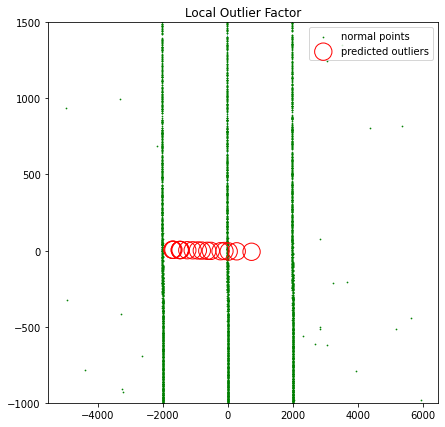

In [31]:
plt.title("Local Outlier Factor")
plt.contourf( Z, cmap=plt.cm.Blues_r)
a2 = plt.scatter(res[0], res[1], c='green', s=0.5,label="normal points")
a2 =plt.scatter(res.iloc[lof_outlier_index,1],res.iloc[lof_outlier_index,0], s=1000 * 0.3,edgecolors="r",facecolors="none",label="predicted outliers")
plt.ylim(-1000,1500)
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (0.5, 0.5)
plt.show()